## Author - Azab Ammar Ahmad
### Data Science & Business Analytics intern at The Sparks Foundation #GRIPSEPT22

### Task 2 - Prediction using Unsupervised ML

From the given 'Iris' dataset, predict the optimum number of clusters
and represent it visually.

### Solusion steps:
1- First of all we'll prepare the data and select a proper clustering algorithm:


*   We'll prepare the data for clustering using the StandardScaler to scale the whole data set.
*   For the sake of simplicity we'll use a K-Means model.

2- There are several methods of how to determine (visually) the right number of clusters. We will use the elbow-plot method.

3- To visualize our clusters in a 2D space, we need to use dimension reduction techniques, I've used PCA.

## Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Mount to drive

In [2]:
# Mount to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load & Read Data

In [3]:
# I've got data from 'https://bit.ly/3kXTdox' that mentiond in the task description
# read data
df = pd.read_csv('drive/MyDrive/TSF-GRIP/Task2/Iris.csv')
print("Data has been read successfully")
#display first few rows of data
df.head()

Data has been read successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Explore data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


As we can see the output is a summary includes list of all columns with their data types and the number of non-null values in each column.

We notice that:
*   No variable column has null/missing values
*   There are four columns represents the features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm)   
*   The last column(Species) represent the target




## Greate the features list

In [5]:
X = df.iloc[:, [1,2,3,4]].values
X.shape

(150, 4)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
X_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',	'PetalWidthCm']	

In [8]:
# Scaling is important when working with distance based (e.g., euklidian) cluster algorithms
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Since the fit_transform() strips the column headers
# we add them after the transformation
X_std = pd.DataFrame(X_std, columns=X_columns)

In [9]:
X_std

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


## Finding the optimum number of clusters for k-means using elbow method

In [10]:
from sklearn.cluster import KMeans

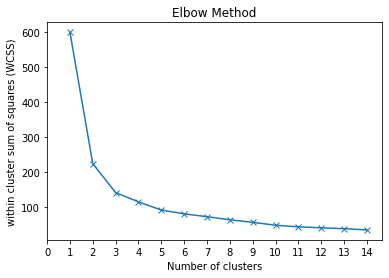

In [11]:
WCSS = []

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_std)
    WCSS.append(km.inertia_)

plt.plot(K, WCSS, marker= "x")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(15))
plt.ylabel('within cluster sum of squares (WCSS)')
plt.title('Elbow Method')
plt.show()

The "elbow" of the above graph gives the optimum number of clusters for our data. This is the point before a roughly linear decrease in the within cluster sum of squares — which in this case is k = 3.


## Applying Kmeans to the dataset 


In [12]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X_std)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## Cluster visualization


In [13]:
# Let's define max. 3 different cluster colors 
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60']

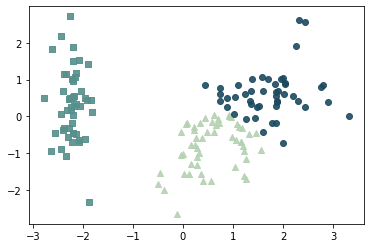

In [14]:
# Visualizing pca
from sklearn.decomposition import PCA

# PCA
pca_scaled_std = PCA(n_components=2,random_state=42)
X_std_pca = pca_scaled_std.fit_transform(X_std)

for l, c, m in zip(range(0, 3), cluster_colors[0:km.n_clusters], ('^', 's', 'o')):
    plt.scatter(X_std_pca[y_kmeans == l, 0],
                X_std_pca[y_kmeans == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )